# 8. Neural Networks and Deep Learning
## Homework

In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/datasets/agrigorev/dino-or-dragon). 


In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# ! pip install tensorflow

### Data Preparation

The dataset contains around 1900 images of dinos and around 1900 images of dragons. 

The dataset contains separate folders for training and test sets. 

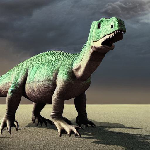

In [3]:
# Load an image of a dino for testing
path = './data/train/dino'
name = 'd263d35f-9b09-48f4-93ec-fb998e3e5d0c.jpg'
fullname = f'{path}/{name}'
load_img(fullname, target_size=(150, 150))

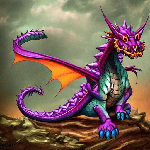

In [4]:
# Load an image of a dragon for testing
path = './data/train/dragon'
name = 'e61477b2-40b3-4edb-bf88-46183186e10a.jpg'
fullname = f'{path}/{name}'
load_img(fullname, target_size=(150, 150))

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [5]:
# The shape for input should be (150, 150, 3)
inputs = keras.Input(shape=(150, 150, 3))

# Create a convolutional layer (Conv2D):
#     Use 32 filters
#     Kernel size should be (3, 3) (that's the size of the filter)
#     Use 'relu' as activation
conv = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)

# Reduce the size of the feature map with max pooling (MaxPooling2D): set the pooling size to (2, 2)
pool = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)

# Turn the multi-dimensional result into vectors using a Flatten layer
vectors = keras.layers.Flatten()(pool)

# Add a Dense layer with 64 neurons and 'relu' activation
dense = keras.layers.Dense(units=64, activation='relu')(vectors)

# Create the Dense layer with 1 neuron - this will be the output
# The output layer should have an activation - use the appropriate activation for the binary classification case
outputs = keras.layers.Dense(units=1, activation='sigmoid')(dense)
model = keras.Model(inputs, outputs)

# As optimizer use SGD with the following parameters: SGD(lr=0.002, momentum=0.8)
optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)

# Specify loss function
loss = keras.losses.BinaryCrossentropy(from_logits=False)

# Add the optimizer, loss and performance metric to the model
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- `binary crossentropy`
- `focal loss`
- `mean squared error`
- `categorical crossentropy`

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`

**Answer 1:** The best loss function for us is **`binary crossentropy`** (check [ML Zoomcamp 8.5 - Transfer Learning, 25:58](https://www.youtube.com/watch?v=WKHylqfNmq4&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=80)).

### Question 2

What's the total number of parameters of the model? You can use the `summary` method for that. 

- 9215873
- 11215873
- 14215873
- 19215873

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________

**Answer 2:** The total number of parameters of the model is **11215873**.

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [7]:
# use the same data generator for both train and test sets
gen = ImageDataGenerator(rescale=1./255)

train_generator = gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20,
    shuffle=True
)

test_generator = gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20,
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [8]:
test_generator.class_indices

{'dino': 0, 'dragon': 1}

In [9]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)

2022-11-21 20:49:45.141439: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
80/80 [==============================] - 57s 696ms/step - loss: 0.6424 - accuracy: 0.6230 - val_loss: 0.6024 - val_accuracy: 0.6218
Epoch 2/10
80/80 [==============================] - 41s 509ms/step - loss: 0.5031 - accuracy: 0.7735 - val_loss: 0.5065 - val_accuracy: 0.7411
Epoch 3/10
80/80 [==============================] - 40s 493ms/step - loss: 0.4193 - accuracy: 0.8331 - val_loss: 0.3887 - val_accuracy: 0.8503
Epoch 4/10
80/80 [==============================] - 39s 486ms/step - loss: 0.3688 - accuracy: 0.8545 - val_loss: 0.3708 - val_accuracy: 0.8477
Epoch 5/10
80/80 [==============================] - 39s 484ms/step - loss: 0.3291 - accuracy: 0.8670 - val_loss: 0.3332 - val_accuracy: 0.8579
Epoch 6/10
80/80 [==============================] - 41s 509ms/step - loss: 0.3046 - accuracy: 0.8752 - val_loss: 0.4559 - val_accuracy: 0.7766
Epoch 7/10
80/80 [==============================] - 38s 469ms/step - loss: 0.2871 - accuracy: 0.8808 - val_loss: 0.3413 - val_accuracy: 0.8350

### Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- 0.90
- 0.20

Text(0, 0.5, 'accuracy')

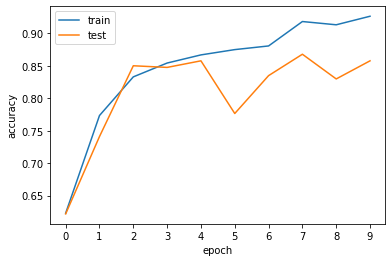

In [10]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xticks(np.arange(10))
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [11]:
np.median(history.history['accuracy'])

0.8710790276527405

**Answer 3:** The median of training accuracy for all the epochs for this model is approximately **0.90**.

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.11
- 0.66
- 0.99
- 0.33

In [12]:
round(np.std(history.history['loss']),3)

0.132

**Answer 4:** The standard deviation of training loss for all the epochs for this model is approximately **0.11**.

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [13]:
gen_aug = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
)

train_generator_aug = gen_aug.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20,
    shuffle=True
)

gen = ImageDataGenerator(rescale=1./255)

test_generator = gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20,
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- 0.37
- 0.97

In [14]:
history_aug = model.fit(
    train_generator_aug,
    epochs=10,
    validation_data=test_generator,
)

Epoch 1/10
80/80 [==============================] - 53s 654ms/step - loss: 0.4384 - accuracy: 0.8011 - val_loss: 0.4085 - val_accuracy: 0.8046
Epoch 2/10
80/80 [==============================] - 58s 720ms/step - loss: 0.4357 - accuracy: 0.7936 - val_loss: 0.3165 - val_accuracy: 0.8528
Epoch 3/10
80/80 [==============================] - 50s 627ms/step - loss: 0.4087 - accuracy: 0.8256 - val_loss: 0.3752 - val_accuracy: 0.8274
Epoch 4/10
80/80 [==============================] - 49s 615ms/step - loss: 0.3711 - accuracy: 0.8413 - val_loss: 0.2489 - val_accuracy: 0.8934
Epoch 5/10
80/80 [==============================] - 50s 627ms/step - loss: 0.3906 - accuracy: 0.8287 - val_loss: 0.4309 - val_accuracy: 0.8198
Epoch 6/10
80/80 [==============================] - 51s 636ms/step - loss: 0.3635 - accuracy: 0.8419 - val_loss: 0.3765 - val_accuracy: 0.8401
Epoch 7/10
80/80 [==============================] - 49s 609ms/step - loss: 0.3508 - accuracy: 0.8526 - val_loss: 0.4406 - val_accuracy: 0.8249

Text(0, 0.5, 'loss')

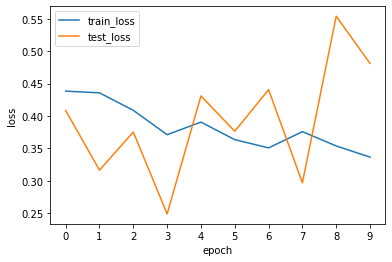

In [15]:
plt.plot(history_aug.history['loss'], label='train_loss')
plt.plot(history_aug.history['val_loss'], label='test_loss')
plt.xticks(np.arange(10))
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

In [16]:
np.mean(history_aug.history['val_loss'])

0.3929004356265068

**Answer 5:** The mean of test loss for all the epochs for the model trained with augmentations is approximately **0.37**.

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- 0.24

Text(0, 0.5, 'accuracy')

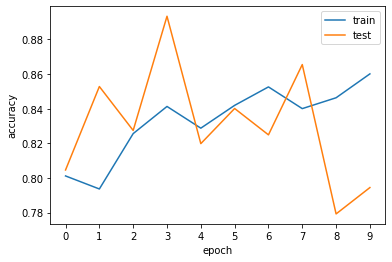

In [17]:
plt.plot(history_aug.history['accuracy'], label='train')
plt.plot(history_aug.history['val_accuracy'], label='test')
plt.xticks(np.arange(10))
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [18]:
np.mean(history_aug.history['val_accuracy'][5:])

0.820812177658081

In [19]:
history_aug.history['val_accuracy']

[0.8045685291290283,
 0.8527919054031372,
 0.8274111747741699,
 0.893401026725769,
 0.8197969794273376,
 0.8401015400886536,
 0.8248730897903442,
 0.8654822111129761,
 0.779187798500061,
 0.7944162487983704]

In [20]:
history_aug.history['val_accuracy'][5:]

[0.8401015400886536,
 0.8248730897903442,
 0.8654822111129761,
 0.779187798500061,
 0.7944162487983704]

**Answer 6:** The average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations is approximately **0.84**.